## Currently easy trials are not removed for any plot, however all results are the same if you do remove easy trials

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import os
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from cycler import cycler
import popoff
import pop_off_functions as pof
import pop_off_plotting as pop
from Session import SessionLite
from linear_model import PoolAcrossSessions, LinearModel, MultiSessionModel
from utils.utils_funcs import d_prime
import statsmodels.api as sm
from tqdm import tqdm
import svgutils.compose as sc
import IPython.display as ip

/home/tplas/repos/popping-off/popoff/popoff/loadpaths.py
/home/tplas/repos/Vape


In [3]:
import scipy
print('scipy', scipy.__version__)
print('sm', sm.__version__)

scipy 1.6.1
sm 0.12.2


In [8]:
pas = PoolAcrossSessions(remove_targets=False, subsample_sessions=False,
                         remove_toosoon=True, pre_start=-0.51)

for ss in pas.sessions.values():
    _ = pop.normalise_raster_data(session=ss, sort_neurons=False, filter_150_stim=False)
    

long post time
long post time
long post time
long post time
long post time
Mouse RL070, run 29  registered no-lick hit. changed to too soon
long post time
long post time
Mouse RL117, run 29  registered no-lick hit. changed to too soon
Mouse RL117, run 29  registered no-lick hit. changed to too soon
long post time
long post time
long post time
Mouse RL116, run 32  registered no-lick hit. changed to too soon
Mouse RL116, run 32  registered no-lick hit. changed to too soon
Mouse RL116, run 32  registered no-lick hit. changed to too soon
long post time
ALERT SESSIONS NOT SUBSAMPLED
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time
long post time


In [9]:
# n_sessions = 11
# for i_s in range(n_sessions):
#     curr_sess = pas.linear_models[i_s].session
#     print(f'{curr_sess}, N_S1: {np.sum(curr_sess.s1_bool)}, N_S2: {np.sum(curr_sess.s2_bool)}, N_hit: {np.sum(curr_sess.outcome == "hit")}, N_miss: {np.sum(curr_sess.outcome == "miss")}, N_ARM: {np.sum(curr_sess.outcome == "arm")}, N_URH: {np.sum(curr_sess.outcome == "urh")}')

In [10]:
print('Pre-stimulus time points:')
print(pas.linear_models[0].session.filter_ps_time[pas.linear_models[0].pre], '\n\n----\n',  pas.linear_models[0].pre_start)
pas.sessions

Pre-stimulus time points:
[-0.5        -0.46666667 -0.43333333 -0.4        -0.36666667 -0.33333333
 -0.3        -0.26666667 -0.23333333 -0.2        -0.16666667 -0.13333333
 -0.1       ] 

----
 -0.51


{0: instance Mouse J064, run 10 of Session class,
 1: instance Mouse J064, run 11 of Session class,
 2: instance Mouse J064, run 14 of Session class,
 3: instance Mouse RL070, run 28 of Session class,
 4: instance Mouse RL070, run 29 of Session class,
 5: instance Mouse RL117, run 26 of Session class,
 6: instance Mouse RL117, run 29 of Session class,
 7: instance Mouse RL117, run 30 of Session class,
 8: instance Mouse RL123, run 22 of Session class,
 9: instance Mouse RL116, run 32 of Session class,
 10: instance Mouse RL116, run 33 of Session class}

In [11]:
reg_list = ['s1', 's2']
cov_dicts = {x: {} for x in reg_list}
super_covar_df_dict = {}
for i_reg, reg in enumerate(reg_list):
    print(reg)
    for i_lm, linear_model in tqdm(enumerate(pas.linear_models)):
        cov_dicts[reg][i_lm] = pof.get_covariates(linear_model, reg, hitmiss_only=True,
                                                 filter_150=False)

    super_covar_df_dict[reg] = pof.create_df_from_cov_dicts(cov_dicts=cov_dicts[reg], 
                                                  zscore_list=['variance_cell_rates', 'mean_pre'])

0it [00:00, ?it/s]

s1


11it [02:02, 11.17s/it]
0it [00:00, ?it/s]

s2


11it [01:42,  9.27s/it]


In [12]:
assert (pas.linear_models[0].session.filter_ps_time == pas.linear_models[0].times_use).all()
# pas.linear_models[0].pre

## My bit fig 4

r: 0.7182738738806617, p: 3.343190567188006e-15, pearson_r: 0.7182738738806618, pearson_p: 3.343190567187981e-15, bonf_correction: 5.5, one_sided_p_opposite_dir: 0.9999999999999816


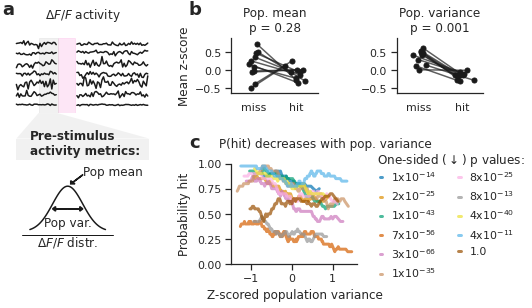

In [16]:
save_fig = False

fig = plt.figure(constrained_layout=False, figsize=(7, 3.5))
gs_sketch_prestim = fig.add_gridspec(ncols=1, nrows=1, bottom=0.65, top=0.95, right=0.3, left=0.01, 
                          hspace=0.3, wspace=0.7)
gs_sketch_metrics = fig.add_gridspec(ncols=1, nrows=1, bottom=0.0, top=0.45, right=0.35, left=0.05, 
                          hspace=0.05, wspace=0.7)
gs_scatter = fig.add_gridspec(ncols=2, nrows=1, bottom=0.73, top=0.95, right=0.95, left=0.45, 
                          hspace=0.3, wspace=0.9)
gs_acc_lines = fig.add_gridspec(ncols=1, nrows=1, bottom=0.05, top=0.45, right=0.7, left=0.45, 
                             hspace=0.8, wspace=0.4)

cov_names = ['mean_pre', 'variance_cell_rates']
region = 's1'

ax_sketch = fig.add_subplot(gs_sketch_prestim[0])
ax_hit_vcr = fig.add_subplot(gs_sketch_metrics[0])
ax_cov_scatter = {x: fig.add_subplot(gs_scatter[i_x]) for i_x, x in enumerate(cov_names)}
ax_vcr_lines = fig.add_subplot(gs_acc_lines[0])

pop.pre_stim_sketch(session=pas.linear_models[0].session, ax=ax_sketch)
pop.covar_sketch(ax=ax_hit_vcr, plot_pc_var=False, plot_corr=False, mid_x=0.25, translate_y=0.4)
pop.scatter_plots_covariates(cov_dicts=cov_dicts[region], cov_names=cov_names, 
                             bonf_n_tests=8,   # use 8 because of supp fig 
                             ax_dict=ax_cov_scatter, lims=None, plot_type='connecting_lines')

pop.plot_accuracy_covar(cov_dicts=cov_dicts[region], zscore_covar=True, verbose=0,
                        one_sided_ws=20, ax=ax_vcr_lines, sessions=pas.sessions)
ax_vcr_lines.set_title('                P(hit) decreases with pop. variance', y=1.1)

assert len(pas.linear_models[0].session.filter_ps_time) == len(pas.linear_models[0].pre)

ax_sketch.annotate('a', xy=(0.005, 0.95), xycoords='figure fraction', 
                   weight='bold', size=18)
ax_sketch.annotate('b', xy=(0.355, 0.95), xycoords='figure fraction', 
                   weight='bold', size=18)
ax_sketch.annotate('c',  xy=(0.355, 0.52), xycoords='figure fraction', 
                   weight='bold', size=18)

fig.align_ylabels(axs=[ax_cov_scatter['mean_pre'], ax_vcr_lines])
fig.align_xlabels(axs=[ax_cov_scatter['mean_pre'], ax_cov_scatter['variance_cell_rates']])

if save_fig:
    plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/Figure4top_thijs_component.pdf',
                    bbox_inches='tight')

# New fig 5?


Summary GLM:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1520
Model:                            GLM   Df Residuals:                     1517
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -890.36
Date:                Mon, 05 Sep 2022   Deviance:                       1780.7
Time:                        09:59:30   Pearson chi2:                 1.52e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                

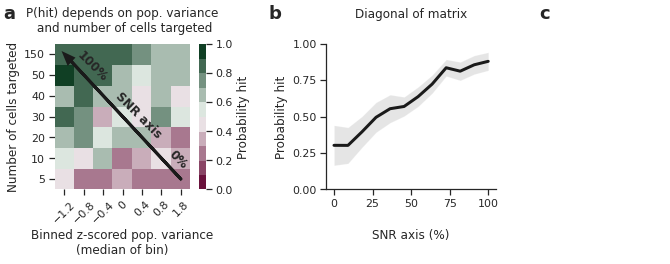

In [10]:
save_fig = False
plot_arrow = True

fig = plt.figure(constrained_layout=False, figsize=(11, 2.25))
gs_bottom = fig.add_gridspec(ncols=3, nrows=1, bottom=0.05, top=0.95, right=0.95, left=0.05, 
                             hspace=0.3, wspace=0.6)
n_bins = 7
region = 's1'

ax_matrix = fig.add_subplot(gs_bottom[0])
ax_collapsed_matrix = fig.add_subplot(gs_bottom[1])

_ = pop.plot_density_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='fraction_hit', ax=ax_matrix,  plot_arrow=plot_arrow,
                               include_150=True)


pop.plot_collapsed_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='fraction_hit', ax=ax_collapsed_matrix, pool_trials=True,
                                 include_150=True, verbose=1)

assert len(pas.linear_models[0].session.filter_ps_time) == len(pas.linear_models[0].pre)

fig.align_xlabels(axs=[ax_matrix, ax_collapsed_matrix])
ax_matrix.annotate('a', xy=(0.005, 0.93), xycoords='figure fraction', 
                   weight='bold', size=18)
ax_matrix.annotate('b', xy=(0.4, 0.93), xycoords='figure fraction', 
                   weight='bold', size=18)
ax_matrix.annotate('c',  xy=(0.805, 0.93), xycoords='figure fraction', 
                   weight='bold', size=18)
if save_fig:
    if plot_arrow:
        plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4bottom_wo_schem.svg',
                    bbox_inches='tight')        
    else:
        plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4bottom_wo_schem_no-arrow.svg',
                    bbox_inches='tight')

In [110]:
## Combine svgs
sc.Figure('15.2cm', '5.1cm',
          sc.Panel(sc.SVG('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4bottom_wo_schem.svg').scale(0.02).move(0, 0)),
          sc.Panel(sc.SVG('/home/tplas/repos/popping-off/figures/schematic_snr_fig_4.svg').scale(0.04).move(10.75, 0))
                  ).save('/home/tplas/repos/popping-off/figures/full_figs_manuscript/Figure4bottom.svg')

## Show svg
ip.SVG('/home/tplas/repos/popping-off/figures/full_figs_manuscript/Figure4bottom.svg')

In [11]:
# tmp = pop.plot_density_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
#                                    metric='fraction_hit', ax=ax_matrix,  plot_arrow=plot_arrow,
#                                include_150=True)

In [20]:
# (mat_fraction, median_cov_perc_arr, n_stim_arr) = tmp
# import pandas as pd
# tmp_elong_table = np.zeros((mat_fraction.size, 3))

# ii = 0
# for i_nstim, n_stim in enumerate(n_stim_arr):  # select bin and compute fraction hit
#     for i_cov_perc, cov_perc in enumerate(median_cov_perc_arr):
#         tmp_elong_table[ii, 0] = n_stim 
#         tmp_elong_table[ii, 1] = cov_perc 
#         tmp_elong_table[ii, 2] = mat_fraction[i_nstim, i_cov_perc]
#         ii += 1

# tmp_df_elong = pd.DataFrame({'n_stim': tmp_elong_table[:, 0],
#                              'pop_var': tmp_elong_table[:, 1],
#                              'fraction_hm': tmp_elong_table[:, 2]})

# indep_var = tmp_df_elong[['n_stim', 'pop_var']]     
# model = sm.GLM(tmp_df_elong['fraction_hm'], sm.add_constant(indep_var), family=sm.families.Binomial())  # equivalent to sklearn.linear_model.LogisticRegression(), but provides p values for coefs
# results = model.fit() 
# print(results.summary())

# # print(tmp_elong_table)


#  Old full main fig 4

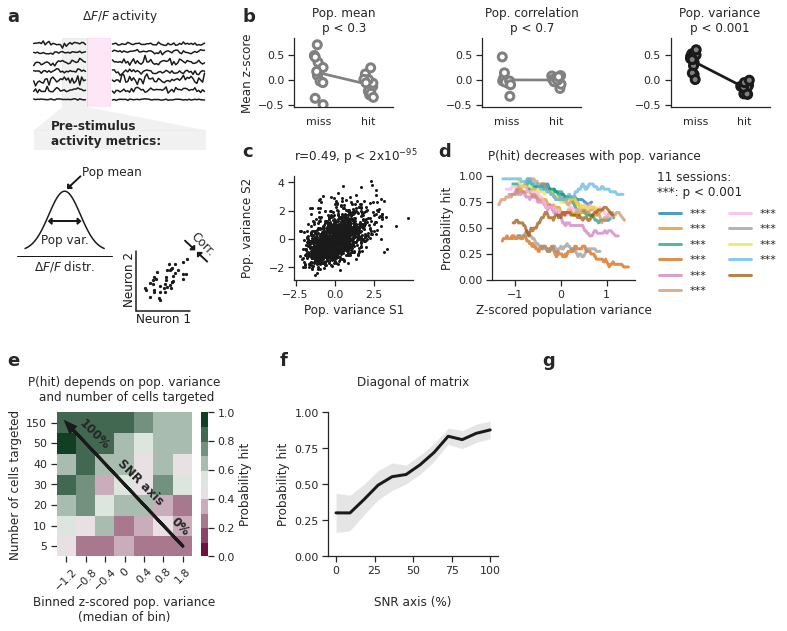

In [31]:
## Code for full fig 4 before 12 Oct 2021

save_fig = False
plot_pc_var = False
plot_arrow = True

fig = plt.figure(constrained_layout=False, figsize=(11, 8))
gs_sketch_prestim = fig.add_gridspec(ncols=1, nrows=1, bottom=0.83, top=0.95, right=0.25, left=0.01, 
                          hspace=0.3, wspace=0.7)
gs_sketch_metrics = fig.add_gridspec(ncols=1, nrows=1, bottom=0.45, top=0.71, right=0.25, left=0.05, 
                          hspace=0.05, wspace=0.7)

gs_scatter = fig.add_gridspec(ncols=(5 if plot_pc_var else 3), nrows=1, bottom=0.83, top=0.95, right=0.95, left=0.35, 
                          hspace=0.3, wspace=0.9)
gs_scatter_s1s2 = fig.add_gridspec(ncols=1, nrows=1, bottom=0.53, top=0.71, right=0.5, left=0.35, 
                          hspace=0.3, wspace=0.7)
gs_acc_lines = fig.add_gridspec(ncols=1, nrows=1, bottom=0.53, top=0.71, right=0.78, left=0.6, 
                             hspace=0.8, wspace=0.4)
gs_bottom = fig.add_gridspec(ncols=3, nrows=1, bottom=0.05, top=0.3, right=0.95, left=0.05, 
                             hspace=0.3, wspace=0.6)

if plot_pc_var:
    cov_names = ['mean_pre', 'variance_cell_rates', 'mean_cell_variance', 'var_cell_variance', 'corr_pre']
else:
    cov_names = ['mean_pre', 'corr_pre', 'variance_cell_rates']
n_bins = 7
region = 's1'

ax_sketch = fig.add_subplot(gs_sketch_prestim[0])
ax_hit_vcr = fig.add_subplot(gs_sketch_metrics[0])
# ax_miss_vcr = fig.add_subplot(gs_sketch_metrics[1])
ax_cov_scatter = {x: fig.add_subplot(gs_scatter[i_x]) for i_x, x in enumerate(cov_names)}

ax_vcr_s1s2 = fig.add_subplot(gs_scatter_s1s2[0])
ax_vcr_lines = fig.add_subplot(gs_acc_lines[0])
ax_collapsed_matrix = fig.add_subplot(gs_bottom[1])
ax_matrix = fig.add_subplot(gs_bottom[0])

pop.pre_stim_sketch(session=pas.linear_models[0].session, ax=ax_sketch)
# pop.firing_rate_dist(lm=pas.linear_models[0], region='s1', match_tnums=False, sort=False,
#                       ax_hit=ax_hit_vcr, ax_miss=ax_miss_vcr)
pop.covar_sketch(ax=ax_hit_vcr, plot_pc_var=plot_pc_var)
pop.scatter_plots_covariates(cov_dicts=cov_dicts[region], cov_names=cov_names, 
                             bonf_n_tests=8,   # use 8 because of supp fig 
                             ax_dict=ax_cov_scatter, lims=None, plot_type='pointplot')

pop.plot_accuracy_covar(cov_dicts=cov_dicts[region], zscore_covar=True, verbose=0,
                        one_sided_ws=20, ax=ax_vcr_lines, sessions=pas.sessions)
ax_vcr_lines.set_title('                P(hit) decreases with pop. variance', y=1.1)
pop.scatter_covar_s1s2(super_covar_df_dict=super_covar_df_dict, ax=ax_vcr_s1s2)

pop.plot_collapsed_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='fraction_hit', ax=ax_collapsed_matrix, pool_trials=True,
                                 include_150=True)

pop.plot_density_hit_miss_covar(super_covar_df=super_covar_df_dict[region], n_bins_covar=n_bins,
                                   metric='fraction_hit', ax=ax_matrix,  plot_arrow=plot_arrow,
                               include_150=True)

assert len(pas.linear_models[0].session.filter_ps_time) == len(pas.linear_models[0].pre)
time_pre = pas.linear_models[0].session.filter_ps_time[pas.linear_models[0].pre]
str_time = f'Pre-stimulus time points from {np.round(time_pre[0], 2)} to {np.round(time_pre[-1], 2)}'
signature_time = f'{np.round(time_pre[0], 2)}_to_{np.round(time_pre[-1], 2)}'.replace('.', ',')

# ax_cov_scatter[cov_names[0]].text(s=f'{region.upper()} activity of all {len(super_covar_df_dict[region])} trials of {len(pas.linear_models)} sessions. {str_time}.',
#                                   x=0, y=1.2, fontdict={'weight': 'bold'});

if plot_pc_var:
    ax_cov_scatter[cov_names[0]].text(s='a', x=-8.6, y=1.17, fontdict={'weight': 'bold', 'size': 18})
    ax_cov_scatter[cov_names[0]].text(s='b', x=-1.73, y=1.17, fontdict={'weight': 'bold', 'size': 18})
    ax_cov_scatter[cov_names[0]].text(s='c', x=-1.73, y=-1.55, fontdict={'weight': 'bold', 'size': 18})
    ax_cov_scatter[cov_names[0]].text(s='d', x=3.6, y=-1.55, fontdict={'weight': 'bold', 'size': 18})
    ax_cov_scatter[cov_names[0]].text(s='e', x=-8.6, y=-5.78, fontdict={'weight': 'bold', 'size': 18})
    ax_cov_scatter[cov_names[0]].text(s='f', x=-1.05, y=-5.78, fontdict={'weight': 'bold', 'size': 18})
    ax_cov_scatter[cov_names[0]].text(s='g', x=6.2, y=-5.78, fontdict={'weight': 'bold', 'size': 18})
else:
    ax_cov_scatter[cov_names[0]].text(s='a', x=-6.3, y=1.17, fontdict={'weight': 'bold', 'size': 18})
    ax_cov_scatter[cov_names[0]].text(s='b', x=-1.55, y=1.17, fontdict={'weight': 'bold', 'size': 18})
    ax_cov_scatter[cov_names[0]].text(s='c', x=-1.55, y=-1.55, fontdict={'weight': 'bold', 'size': 18})
    ax_cov_scatter[cov_names[0]].text(s='d', x=2.4, y=-1.55, fontdict={'weight': 'bold', 'size': 18})
    ax_cov_scatter[cov_names[0]].text(s='e', x=-6.3, y=-5.78, fontdict={'weight': 'bold', 'size': 18})
    ax_cov_scatter[cov_names[0]].text(s='f', x=-0.8, y=-5.78, fontdict={'weight': 'bold', 'size': 18})
    ax_cov_scatter[cov_names[0]].text(s='g', x=4.5, y=-5.78, fontdict={'weight': 'bold', 'size': 18})

fig.align_ylabels(axs=[ax_cov_scatter['mean_pre'], ax_vcr_s1s2])
fig.align_xlabels(axs=[ax_matrix, ax_collapsed_matrix])

if save_fig:
    plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4_old_format_new_data.pdf',
                bbox_inches='tight')   
    
#     if plot_arrow:
#         plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4_wo_schem.svg',
#                     bbox_inches='tight')        
#     else:
#         plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4_wo_schem_no-arrow.svg',
#                     bbox_inches='tight')

In [10]:
## Combine svgs
sc.Figure('15.6cm', '12.4cm',
          sc.Panel(sc.SVG('/home/tplas/repos/popping-off/figures/full_figs_manuscript/fig_4_wo_schem.svg').scale(0.02).move(0, 0)),
          sc.Panel(sc.SVG('/home/tplas/repos/popping-off/figures/schematic_snr_fig_4.svg').scale(0.04).move(10.75, 7.5))
                  ).save('/home/tplas/repos/popping-off/figures/full_figs_manuscript/Figure4.svg')

## Show svg
ip.SVG('/home/tplas/repos/popping-off/figures/full_figs_manuscript/Figure4.svg')

# Supp with scatter plots 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

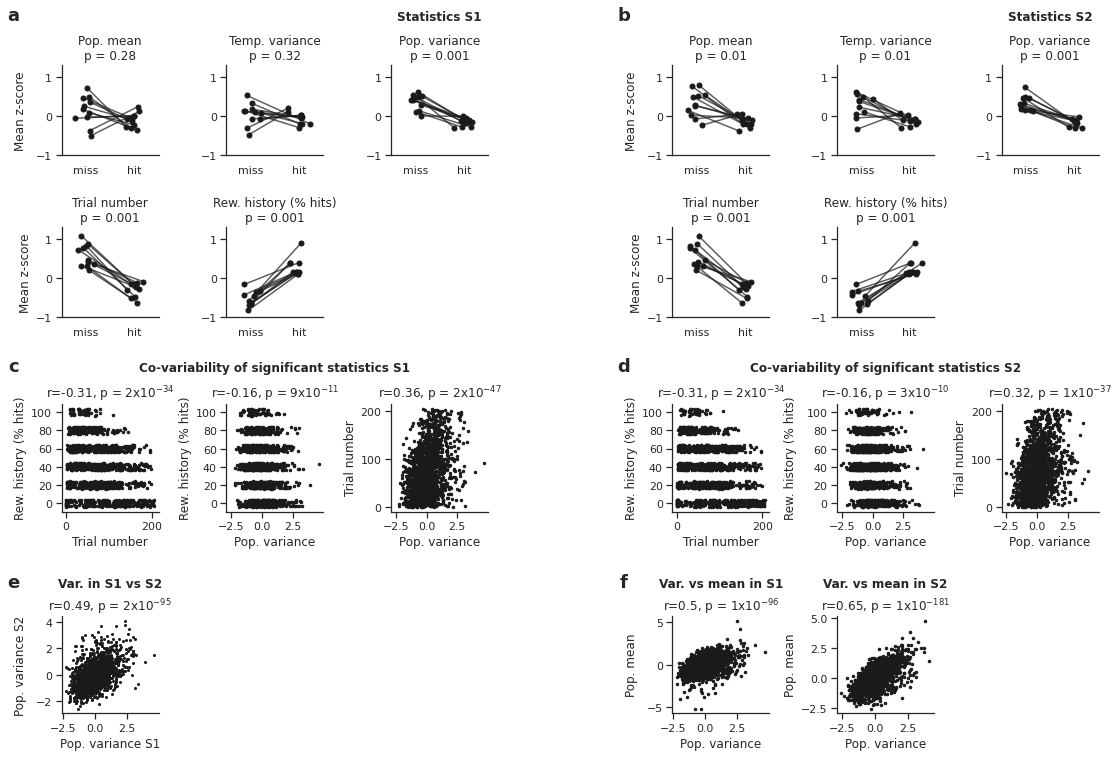

In [19]:
cov_names = ['mean_pre', 'mean_cell_variance', 'variance_cell_rates',
             'trial_number', 'reward_history']
save_fig = True

fig = plt.figure(constrained_layout=False, figsize=(16, 10))
gs_pointplot = {}
gs_pointplot['s1'] = fig.add_gridspec(ncols=3, nrows=2, bottom=0.6, top=0.95, right=0.42, left=0.05, 
                          hspace=0.8, wspace=0.7)

gs_pointplot['s2'] = fig.add_gridspec(ncols=3, nrows=2, bottom=0.6, top=0.95, right=0.95, left=0.58, 
                          hspace=0.8, wspace=0.7)

gs_scatter = {}
gs_scatter['s1'] = fig.add_gridspec(ncols=3, nrows=1, bottom=0.33, top=0.48, right=0.42, left=0.05, 
                          hspace=0.8, wspace=0.7)

gs_scatter['s2'] = fig.add_gridspec(ncols=3, nrows=1, bottom=0.33, top=0.48, right=0.95, left=0.58, 
                          hspace=0.8, wspace=0.7)

gs_s1s2_compare = fig.add_gridspec(ncols=3, nrows=1, bottom=0.05, top=0.185, right=0.42, left=0.05, 
                          hspace=0.8, wspace=0.7)

gs_scatter_s2_below = fig.add_gridspec(ncols=3, nrows=1, bottom=0.05, top=0.185, right=0.95, left=0.58, 
                          hspace=0.8, wspace=0.7)

ax_dict, ax_scatter, ax_s2b = {}, {}, {}
for i_reg, reg in enumerate(['s1', 's2']):
    ax_dict[reg] = {}
    icov = 0
    for irow in range(3):
        for icol in range(3):
            if icov < len(cov_names):
                ax_dict[reg][cov_names[icov]] = fig.add_subplot(gs_pointplot[reg][irow, icol])
                icov += 1
            
            
    pop.scatter_plots_covariates(cov_dicts=cov_dicts[reg], 
                             ax_dict=ax_dict[reg], 
                             cov_names=cov_names,
                             lims=None, plot_type='connecting_lines')

    ax_scatter[reg] = {k: fig.add_subplot(gs_scatter[reg][k]) for k in range(3)}
    pop.plot_scatter_all_trials_two_covars(super_covar_df_dict=super_covar_df_dict, 
                                       covar_1='trial_number',
                                       covar_2='reward_history',
                                          ax=ax_scatter[reg][0], region=reg)
    
    pop.plot_scatter_all_trials_two_covars(super_covar_df_dict=super_covar_df_dict, 
                                       covar_1='variance_cell_rates',
                                       covar_2='reward_history',
                                          ax=ax_scatter[reg][1], region=reg)
    
    pop.plot_scatter_all_trials_two_covars(super_covar_df_dict=super_covar_df_dict, 
                                       covar_1='variance_cell_rates',
                                       covar_2='trial_number',
                                          ax=ax_scatter[reg][2], region=reg)
    
    for icov, covname in enumerate(cov_names):
        if icov % 3 == 0:
            ax_dict[reg][covname].set_ylabel('Mean z-score')
        ax_dict[reg][covname].set_ylim([-1, 1.3])
        
    ax_dict[reg]['variance_cell_rates'].annotate(text=f'Statistics {reg.upper()}',
                                      xy=(0.5, 1.5), xycoords='axes fraction',
                                      weight='bold', ha='center')
    ax_scatter[reg][1].annotate(text=f'Co-variability of significant statistics {reg.upper()}',
                                      xy=(0.5, 1.3), xycoords='axes fraction',
                                      weight='bold', ha='center')

for i_plot_s2b, reg_s2b in enumerate(['s1', 's2']):
    ax_s2b[reg_s2b] = fig.add_subplot(gs_scatter_s2_below[i_plot_s2b])
    pop.plot_scatter_all_trials_two_covars(super_covar_df_dict=super_covar_df_dict, 
                                           covar_1='variance_cell_rates',
                                           covar_2='mean_pre',
                                           ax=ax_s2b[reg_s2b], region=reg_s2b)
    ax_s2b[reg_s2b].annotate(text=f'Var. vs mean in {reg_s2b.upper()}',
                                      xy=(0.5, 1.3), xycoords='axes fraction',
                                      weight='bold', ha='center')
    
    
ax_popvar_s1s2 = fig.add_subplot(gs_s1s2_compare[0])
pop.scatter_covar_s1s2(super_covar_df_dict=super_covar_df_dict, ax=ax_popvar_s1s2)
ax_popvar_s1s2.annotate(text=f'Var. in S1 vs S2',
                                      xy=(0.5, 1.3), xycoords='axes fraction',
                                      weight='bold', ha='center')

fig.align_ylabels(axs=[ax_dict['s1']['mean_pre'], ax_dict['s1']['reward_history'], ax_scatter['s1'][0], ax_popvar_s1s2])
fig.align_ylabels(axs=[ax_dict['s2']['mean_pre'], ax_dict['s2']['reward_history'], ax_scatter['s2'][0], ax_s2b['s1']])
fig.align_ylabels(axs=[ax_scatter['s2'][1], ax_s2b['s2']])

ax_dict['s1']['mean_pre'].annotate(text='a', size=18,
                                  xy=(-0.5, 1.5), xycoords='axes fraction',
                                  weight='bold', ha='center')
ax_dict['s2']['mean_pre'].annotate(text='b', size=18,
                                  xy=(-0.5, 1.5), xycoords='axes fraction',
                                  weight='bold', ha='center')
ax_scatter['s1'][0].annotate(text='c', size=18,
                                  xy=(-0.5, 1.3), xycoords='axes fraction',
                                  weight='bold', ha='center')
ax_scatter['s2'][0].annotate(text='d', size=18,
                                  xy=(-0.5, 1.3), xycoords='axes fraction',
                                  weight='bold', ha='center')
ax_scatter['s1'][0].annotate(text='e', size=18,
                                  xy=(-0.5, -0.7), xycoords='axes fraction',
                                  weight='bold', ha='center')
ax_scatter['s2'][0].annotate(text='f', size=18,
                                  xy=(-0.5, -0.7), xycoords='axes fraction',
                                  weight='bold', ha='center')
for ii in range(3): 
    pop.equal_lims_two_axs(ax1=ax_scatter['s1'][ii], ax2=ax_scatter['s2'][ii])
if save_fig:
    # plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/Supplementary_Figure6_new_with_temp_var.pdf',
    #             bbox_inches='tight')
    plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/Supplementary_Figure6_new_with_temp_var.eps',
                bbox_inches='tight', format='eps')

In [92]:
pop.readable_p_significance_statement(0.03, n_bonf=3)

('p = 0.03', 'n.s.')

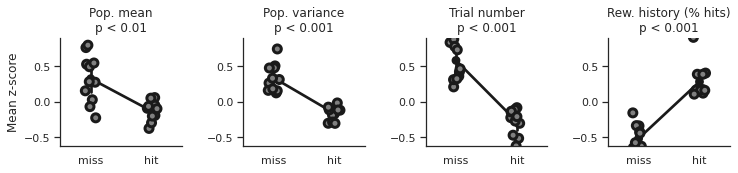

In [45]:
pop.scatter_plots_covariates(cov_dicts=cov_dicts[reg], 
                             cov_names=cov_names,
                             lims=None, plot_type='pointplot')

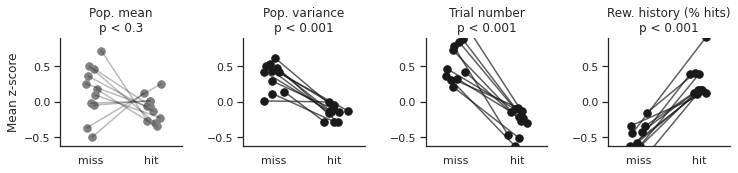

In [59]:
pop.scatter_plots_covariates(cov_dicts=cov_dicts['s1'], 
                             cov_names=cov_names,
                             lims=None, plot_type='connecting_lines')

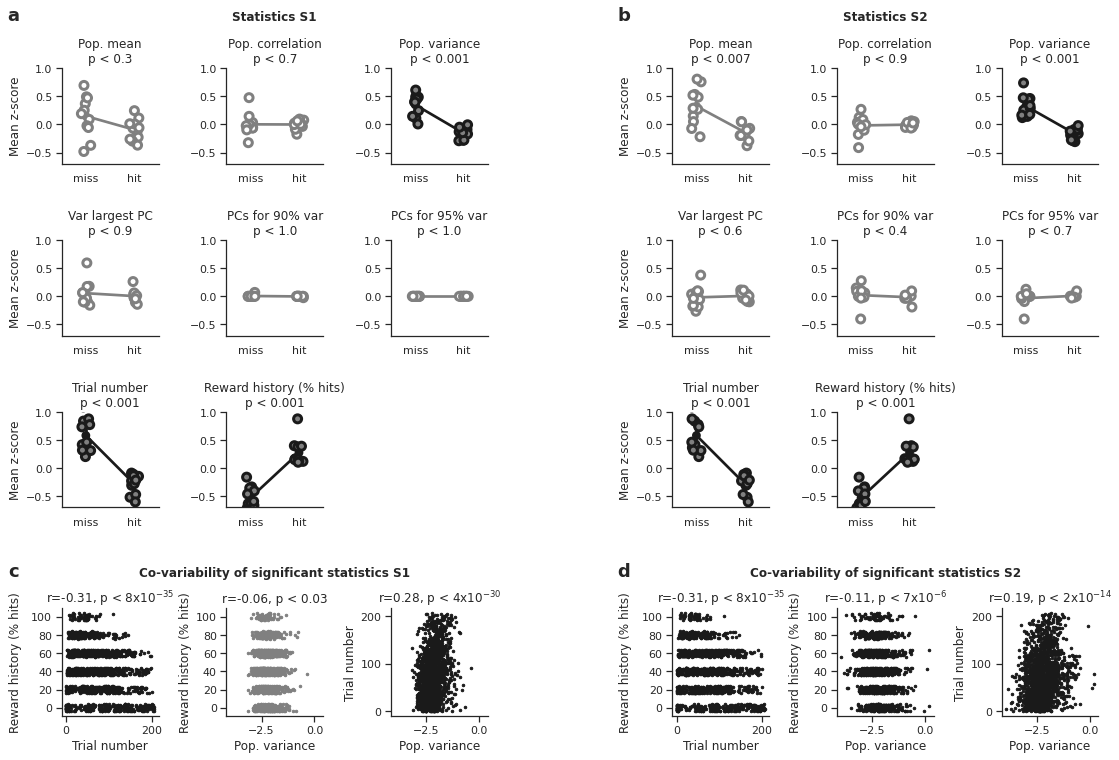

In [98]:

cov_names = ['mean_pre', 'corr_pre', 'variance_cell_rates',
             'largest_PC_var', 'n_PCs_90', 'n_PCs_95',
             'trial_number', 'reward_history']
save_fig = False


fig = plt.figure(constrained_layout=False, figsize=(16, 10))
gs_pointplot = {}
gs_pointplot['s1'] = fig.add_gridspec(ncols=3, nrows=3, bottom=0.34, top=0.95, right=0.42, left=0.05, 
                          hspace=0.8, wspace=0.7)

gs_pointplot['s2'] = fig.add_gridspec(ncols=3, nrows=3, bottom=0.34, top=0.95, right=0.95, left=0.58, 
                          hspace=0.8, wspace=0.7)

gs_scatter = {}
gs_scatter['s1'] = fig.add_gridspec(ncols=3, nrows=1, bottom=0.05, top=0.2, right=0.42, left=0.05, 
                          hspace=0.8, wspace=0.7)

gs_scatter['s2'] = fig.add_gridspec(ncols=3, nrows=1, bottom=0.05, top=0.2, right=0.95, left=0.58, 
                          hspace=0.8, wspace=0.7)

ax_dict, ax_scatter = {}, {}
for i_reg, reg in enumerate(['s1', 's2']):
    ax_dict[reg] = {}
    icov = 0
    for irow in range(3):
        for icol in range(3):
            if icov < len(cov_names):
                ax_dict[reg][cov_names[icov]] = fig.add_subplot(gs_pointplot[reg][irow, icol])
                icov += 1
            
            
    pop.scatter_plots_covariates(cov_dicts=cov_dicts[reg], 
                             ax_dict=ax_dict[reg], 
                             cov_names=cov_names,
                             lims=None, plot_type='pointplot')

    ax_scatter[reg] = {k: fig.add_subplot(gs_scatter[reg][k]) for k in range(3)}
    pop.plot_scatter_all_trials_two_covars(cov_dicts=cov_dicts, 
                                       covar_1='trial_number',
                                       covar_2='reward_history',
                                          ax=ax_scatter[reg][0], region=reg)
    
    pop.plot_scatter_all_trials_two_covars(cov_dicts=cov_dicts, 
                                       covar_1='variance_cell_rates',
                                       covar_2='reward_history',
                                          ax=ax_scatter[reg][1], region=reg)
    
    pop.plot_scatter_all_trials_two_covars(cov_dicts=cov_dicts, 
                                       covar_1='variance_cell_rates',
                                       covar_2='trial_number',
                                          ax=ax_scatter[reg][2], region=reg)
    
    for icov, covname in enumerate(cov_names):
        if icov % 3 == 0:
            ax_dict[reg][covname].set_ylabel('Mean z-score')
        ax_dict[reg][covname].set_ylim([-0.7, 1])
        
    ax_dict[reg]['corr_pre'].annotate(text=f'Statistics {reg.upper()}',
                                      xy=(0.5, 1.5), xycoords='axes fraction',
                                      weight='bold', ha='center')
    ax_scatter[reg][1].annotate(text=f'Co-variability of significant statistics {reg.upper()}',
                                      xy=(0.5, 1.3), xycoords='axes fraction',
                                      weight='bold', ha='center')
    
    fig.align_ylabels(axs=[ax_dict[reg]['mean_pre'], ax_scatter[reg][0]])
    
ax_dict['s1']['mean_pre'].annotate(text='a', size=18,
                                  xy=(-0.5, 1.5), xycoords='axes fraction',
                                  weight='bold', ha='center')
ax_dict['s2']['mean_pre'].annotate(text='b', size=18,
                                  xy=(-0.5, 1.5), xycoords='axes fraction',
                                  weight='bold', ha='center')
ax_scatter['s1'][0].annotate(text='c', size=18,
                                  xy=(-0.5, 1.3), xycoords='axes fraction',
                                  weight='bold', ha='center')
ax_scatter['s2'][0].annotate(text='d', size=18,
                                  xy=(-0.5, 1.3), xycoords='axes fraction',
                                  weight='bold', ha='center')
for ii in range(3): 
    pop.equal_lims_two_axs(ax1=ax_scatter['s1'][ii], ax2=ax_scatter['s2'][ii])
if save_fig:
    plt.savefig('/home/tplas/repos/popping-off/figures/full_figs_manuscript/Supplementary_Figure6.pdf',
                bbox_inches='tight')